# Analiza filmov

Uvozim vse datoteke, ki so potrebne za delovanje programa. Movies_data.csv je datoteka v kateri so shranjeni vsi podatki (naslov, gross income, ocene gledalcev in kritikov). Podatke sem dobil iz spletne strani `https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/` in `https://www.rottentomatoes.com/`. Obseg zajema prvih 500 filmov po največjem dobičku iz prodaje kart.

In [83]:
# Paketi za obdelavo podatkov
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# Naložim razpredelico movie_data.csv
filmi = pd.read_csv('movie_data.csv')

In [85]:
# Prvih 10 v razpredelnici
filmi.head(10)

,Rank,Name,Gross Income,Audience Score,Critics Score,Director,Distributor,Release date
0,1,Avatar,"$2,923,706,026",82%,81%,James Cameron,20th Century Fox,"Dec 18, 2009,"
1,2,Avengers: Endgame,"$2,748,242,781",90%,94%,"Anthony Russo, Joe Russo",Walt Disney,"Apr 26, 2019,"
2,3,Avatar: The Way of Water,"$2,317,514,386",92%,76%,James Cameron,20th Century Studios,"Dec 16, 2022,"
3,4,Titanic,"$2,223,048,786",69%,88%,James Cameron,"20th Century Fox,, Paramount Pictures","Dec 19, 1997,"
4,5,Star Wars Ep. VII: The Force Awakens,"$2,058,880,845",NaN,NaN,NaN,NaN,NaN
5,6,Avengers: Infinity War,"$2,048,359,754",92%,85%,"Anthony Russo, Joe Russo",Walt Disney,"Apr 27, 2018,"
6,7,Spider-Man: No Way Home,"$1,908,532,719",98%,93%,Jon Watts,Columbia Pictures,"Dec 17, 2021,"
7,8,Jurassic World,"$1,669,963,641",78%,71%,Colin Trevorrow,Universal Pictures,"Jun 12, 2015,"
8,9,The Lion King,"$1,646,106,779",93%,92%,"Roger Allers, Rob Minkoff",Walt Disney Pictures,"Jun 24, 1994,"
9,10,Inside Out 2,"$1,559,255,587",NaN,NaN,NaN,NaN,NaN


In [86]:
# Zadnjih 10 v razpredelnici
filmi.tail(10)

,Rank,Name,Gross Income,Audience Score,Critics Score,Director,Distributor,Release date
490,491,22 Jump Street,"$331,333,876",NaN,NaN,NaN,NaN,NaN
491,492,National Treasure,"$331,323,410",76%,46%,Jon Turteltaub,Buena Vista Pictures,"Nov 19, 2004,"
492,493,Black Swan,"$331,266,710",73%,83%,Henry King,20th Century Fox,"Dec 4, 1942, Original"
493,494,300: Rise of an Empire,"$330,780,051",NaN,NaN,NaN,NaN,NaN
494,495,Meet the Parents,"$330,425,040",79%,85%,Jay Roach,"DreamWorks SKG,, Universal Pictures","Oct 6, 2000,"
495,496,The Curious Case of Benjamin Button,"$329,631,958",NaN,NaN,NaN,NaN,NaN
496,497,The Perfect Storm,"$328,711,434",63%,46%,Wolfgang Petersen,"Warner Bros. Pictures,, Warner Home Vídeo","Jun 30, 2000,"
497,498,Now You See Me 2,"$328,325,007",NaN,NaN,NaN,NaN,NaN
498,499,Crocodile Dundee,"$328,203,506",59%,89%,Peter Faiman,Paramount Pictures,"Sep 26, 1986,"
499,500,Se7en,"$328,125,643",NaN,NaN,NaN,NaN,NaN


In [87]:
# Ime in ocena gledalcev in kritikov
filmi[['Name', 'Audience Score', 'Critics Score']]

,Name,Audience Score,Critics Score
0,Avatar,82%,81%
1,Avengers: Endgame,90%,94%
2,Avatar: The Way of Water,92%,76%
3,Titanic,69%,88%
4,Star Wars Ep. VII: The Force Awakens,NaN,NaN
...,...,...,...
495,The Curious Case of Benjamin Button,NaN,NaN
496,The Perfect Storm,63%,46%
497,Now You See Me 2,NaN,NaN
498,Crocodile Dundee,59%,89%


In [88]:
# Razpredelnica filmov s kritiko občinstva nad 90%
f = filmi.copy()
high_rated = f[f['Audience Score'] > "90%"].sort_values('Audience Score', ascending=False)
high_rated

,Rank,Name,Gross Income,Audience Score,Critics Score,Director,Distributor,Release date
12,13,Top Gun: Maverick,"$1,464,642,326",99%,96%,Joseph Kosinski,Paramount Pictures,"May 27, 2022,"
6,7,Spider-Man: No Way Home,"$1,908,532,719",98%,93%,Jon Watts,Columbia Pictures,"Dec 17, 2021,"
363,364,Bad Boys: Ride or Die,"$398,454,005",97%,65%,"Adil El Arbi, Bilall Fallah",Columbia Pictures,"Jun 7, 2024,"
408,409,Raiders of the Lost Ark,"$367,451,914",96%,93%,Steven Spielberg,Paramount Pictures,"Jun 12, 1981,"
332,333,Bad Boys For Life,"$424,471,663",96%,75%,"Adil El Arbi, Bilall Fallah","Columbia Pictures,, Sony Pictures Entertainment","Jan 17, 2020,"
262,263,Saving Private Ryan,"$485,035,085",95%,94%,Steven Spielberg,"Paramount Pictures,, DreamWorks SKG","Jul 24, 1998,"
28,29,Spider-Man: Far From Home,"$1,132,937,929",95%,91%,Jon Watts,"Columbia Pictures,, Sony Pictures Entertainment","Jul 2, 2019,"
149,150,Forrest Gump,"$679,835,137",95%,76%,Robert Zemeckis,Paramount Pictures,"Jul 6, 1994,"
137,138,Dune: Part Two,"$710,020,114",95%,92%,Denis Villeneuve,Warner Bros. Pictures,"Mar 1, 2024,"
70,71,The Lord of the Rings: The Two Towers,"$921,715,176",95%,95%,Peter Jackson,New Line Cinema,"Dec 5, 2002,"


In [89]:
# Razpredelnica filmov s kritikov in občinstva nad 90%
high_rated = filmi[(filmi['Critics Score'] > "90%") & (filmi['Audience Score'] > "90%")].sort_values('Critics Score', ascending=False)
high_rated

,Rank,Name,Gross Income,Audience Score,Critics Score,Director,Distributor,Release date
250,251,How to Train Your Dragon,"$494,870,992",91%,99%,"Christopher Sanders, Dean DeBlois","DreamWorks SKG,, Paramount Pictures","Mar 26, 2010,"
52,53,Zootopia,"$1,002,462,578",92%,98%,"Byron Howard, Rich Moore",Walt Disney,"Mar 4, 2016,"
12,13,Top Gun: Maverick,"$1,464,642,326",99%,96%,Joseph Kosinski,Paramount Pictures,"May 27, 2022,"
70,71,The Lord of the Rings: The Two Towers,"$921,715,176",95%,95%,Peter Jackson,New Line Cinema,"Dec 5, 2002,"
261,262,Puss in Boots: The Last Wish,"$485,254,377",94%,95%,Joel Crawford,Universal Pictures,"Dec 21, 2022,"
148,149,Spider-Man: Across the Spider-Verse,"$681,222,435",94%,95%,"Joaquim Dos Santos, Kemp Powers, Justin K. Tho...",Sony Pictures,"Jun 2, 2023,"
192,193,Iron Man,"$585,171,547",91%,94%,Jon Favreau,Paramount Pictures,"May 2, 2008,"
377,378,Star Trek,"$386,839,614",91%,94%,J.J. Abrams,Paramount Pictures,"May 7, 2009,"
50,51,The Dark Knight,"$1,007,695,772",94%,94%,Christopher Nolan,Warner Bros. Pictures,"Jul 18, 2008,"
262,263,Saving Private Ryan,"$485,035,085",95%,94%,Steven Spielberg,"Paramount Pictures,, DreamWorks SKG","Jul 24, 1998,"


In [90]:
#Razpredelnica filmov, ki imajo oceno občinstva višjo od kritikov
selected = filmi[filmi['Audience Score'] > filmi['Critics Score']].sort_values('Audience Score', ascending=False)
selected

,Rank,Name,Gross Income,Audience Score,Critics Score,Director,Distributor,Release date
12,13,Top Gun: Maverick,"$1,464,642,326",99%,96%,Joseph Kosinski,Paramount Pictures,"May 27, 2022,"
6,7,Spider-Man: No Way Home,"$1,908,532,719",98%,93%,Jon Watts,Columbia Pictures,"Dec 17, 2021,"
363,364,Bad Boys: Ride or Die,"$398,454,005",97%,65%,"Adil El Arbi, Bilall Fallah",Columbia Pictures,"Jun 7, 2024,"
332,333,Bad Boys For Life,"$424,471,663",96%,75%,"Adil El Arbi, Bilall Fallah","Columbia Pictures,, Sony Pictures Entertainment","Jan 17, 2020,"
408,409,Raiders of the Lost Ark,"$367,451,914",96%,93%,Steven Spielberg,Paramount Pictures,"Jun 12, 1981,"
...,...,...,...,...,...,...,...,...
402,403,Fifty Shades Freed,"$371,985,018",38%,11%,James Foley,Universal Pictures,"Feb 9, 2018,"
381,382,Independence Day: Resurgence,"$384,169,424",30%,29%,Roland Emmerich,20th Century Fox,"Jun 24, 2016,"
394,395,Godzilla,"$376,000,000",28%,20%,Roland Emmerich,Columbia Pictures,"May 19, 1998,"
229,230,Godzilla,"$529,076,069",28%,20%,Roland Emmerich,Columbia Pictures,"May 19, 1998,"


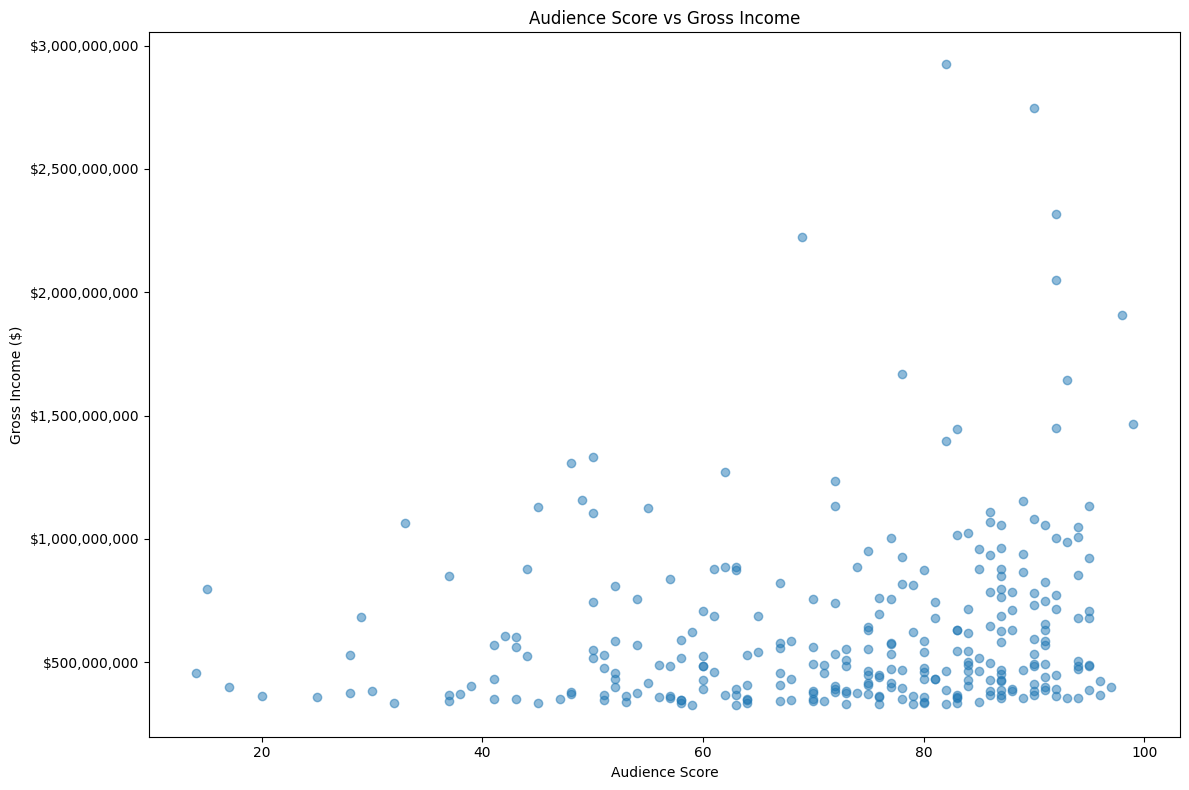

Correlation between Audience Score and Gross Income: 0.18

Statistics:
       Numeric Audience Score  Numeric Gross Income
count              289.000000          2.890000e+02
mean                72.712803          6.295227e+08
std                 18.034608          3.711301e+08
min                 14.000000          3.282035e+08
25%                 61.000000          3.861163e+08
50%                 77.000000          4.932149e+08
75%                 87.000000          7.562447e+08
max                 99.000000          2.923706e+09

Number of movies used in the analysis: 289


In [91]:
#Graf, ki kaže koleracijo med gross incom in oceno občinstva
import matplotlib.pyplot as plt
import pandas as pd

filmi['Numeric Audience Score'] = pd.to_numeric(filmi['Audience Score'].astype(str).str.rstrip('%'), errors='coerce')
filmi['Numeric Gross Income'] = pd.to_numeric(filmi['Gross Income'].str.replace('[$,]', '', regex=True), errors='coerce')

filmi_clean = filmi.dropna(subset=['Numeric Audience Score', 'Numeric Gross Income'])

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(filmi_clean['Numeric Audience Score'], filmi_clean['Numeric Gross Income'], alpha=0.5)

plt.title('Audience Score vs Gross Income')
plt.xlabel('Audience Score')
plt.ylabel('Gross Income ($)')

# Format y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

correlation = filmi_clean['Numeric Audience Score'].corr(filmi_clean['Numeric Gross Income'])
print(f"Correlation between Audience Score and Gross Income: {correlation:.2f}")

print("\nStatistics:")
print(filmi_clean[['Numeric Audience Score', 'Numeric Gross Income']].describe())

print(f"\nNumber of movies used in the analysis: {len(filmi_clean)}")

Presenetljivo je to, da se večina filmov prodaja povprečno, ne glede na oceno. 

In [92]:
# Razpredelnica, ki prikazuje število filmov, glede na studie, ki so jih naredili in skupno prodajo filmov. Prav tako prikazuje povprečno oceno gledalcev in kritikov.
filmi['Numeric Audience Score'] = pd.to_numeric(filmi['Audience Score'].astype(str).str.rstrip('%'), errors='coerce')
filmi['Numeric Critics Score'] = pd.to_numeric(filmi['Critics Score'].astype(str).str.rstrip('%'), errors='coerce')

distributor_groups = filmi.groupby('Distributor').agg({
    'Name': 'count',
    'Gross Income': lambda x: pd.to_numeric(x.astype(str).str.replace('[$,]', '', regex=True), errors='coerce').sum(),
    'Numeric Audience Score': 'mean',
    'Numeric Critics Score': 'mean'
}).sort_values('Gross Income', ascending=False)

distributor_groups = distributor_groups.rename(columns={
    'Name': 'Number of Films',
    'Gross Income': 'Total Gross Income',
    'Numeric Audience Score': 'Average Audience Score',
    'Numeric Critics Score': 'Average Critics Score'
})

distributor_groups['Total Gross Income'] = distributor_groups['Total Gross Income'].apply(lambda x: f'${x:,.0f}')

distributor_groups['Average Audience Score'] = distributor_groups['Average Audience Score'].apply(lambda x: f'{x:.1f}%' if pd.notnull(x) else 'N/A')
distributor_groups['Average Critics Score'] = distributor_groups['Average Critics Score'].apply(lambda x: f'{x:.1f}%' if pd.notnull(x) else 'N/A')

distributor_groups

,Number of Films,Total Gross Income,Average Audience Score,Average Critics Score
Distributor,,,,
Warner Bros. Pictures,45,"$27,684,851,421",77.3%,70.0%
Walt Disney,30,"$24,718,456,991",76.4%,73.4%
Paramount Pictures,42,"$22,543,745,092",69.5%,69.8%
20th Century Fox,40,"$22,242,569,310",71.3%,64.7%
Universal Pictures,30,"$20,883,082,023",65.3%,57.9%
Walt Disney Pictures,13,"$10,394,423,046",86.8%,79.5%
Columbia Pictures,11,"$7,598,384,447",71.7%,67.9%
Sony Pictures Entertainment,11,"$6,908,370,080",71.2%,71.2%
DreamWorks SKG,10,"$4,447,060,445",78.1%,76.5%
